In [9]:
from pathlib import Path
from gsl import ROOT
import pandas as pd

In [10]:
object_names = [
"004_sugar_box",
"005_tomato_soup_can",
"006_mustard_bottle",
"024_bowl",
"025_mug",
]

methods = [
"FLOW_scalesigmoidsoftplus_N8",
"GAN_z2",
"VAE_z4_kl0.01",
]

In [26]:
for object_name in object_names:
    print(object_name)
    for method in methods:
        path = ROOT / f"checkpoints/{object_name}/{method}/result.csv"
        df = pd.read_csv(path)
        print(method)
        # print(df)
        # mask = df.loc[df["coverage rate"].idxmax()]
        # print(mask)
        df_mask = df.where((df["seed"]==0) & (df["number of samples"]>=1000)).dropna()
        print(df_mask["coverage rate"])
        print(df_mask["average shortest path"])
        
        print("==============================================")
    
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")



004_sugar_box
FLOW_scalesigmoidsoftplus_N8
2    0.7074
3    0.9555
4    0.9846
Name: coverage rate, dtype: float64
2    3.408888
3    2.212064
4    1.852044
Name: average shortest path, dtype: float64
GAN_z2
2    0.3423
3    0.4787
4    0.5175
Name: coverage rate, dtype: float64
2    5.540498
3    4.695677
4    4.470346
Name: average shortest path, dtype: float64
VAE_z4_kl0.01
2    0.5074
3    0.7650
4    0.8248
Name: coverage rate, dtype: float64
2    4.385927
3    3.079750
4    2.693753
Name: average shortest path, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
005_tomato_soup_can
FLOW_scalesigmoidsoftplus_N8
2    0.5190
3    0.9334
4    0.9790
Name: coverage rate, dtype: float64
2    3.979217
3    2.491868
4    2.057860
Name: average shortest path, dtype: float64
GAN_z2
2    0.3706
3    0.6919
4    0.7570
Name: coverage rate, dtype: float64
2    4.652162
3    3.410359
4    3.107096
Name: average shortest path, dtype: float64
VAE_z4_kl0.01
2    0.4145
3    0.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from gsl.dataset import read_all
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation

In [25]:
# poses = read_all("004_sugar_box")[0]
# poses = read_all("005_tomato_soup_can")[0]
# poses = read_all("006_mustard_bottle")[0]
# poses = read_all("024_bowl")[0]
# poses = read_all("025_mug")[0]

poses = read_all("003_cracker_box")[0]



In [26]:
xyzs = poses[:, :3]
quats = poses[:, 3:]

rotvecs = Rotation.from_quat(quats).as_rotvec()
index = np.random.randint(0, xyzs.shape[0], 1000)
print(rotvecs.shape)
print(xyzs.shape)

(108528, 3)
(108528, 3)


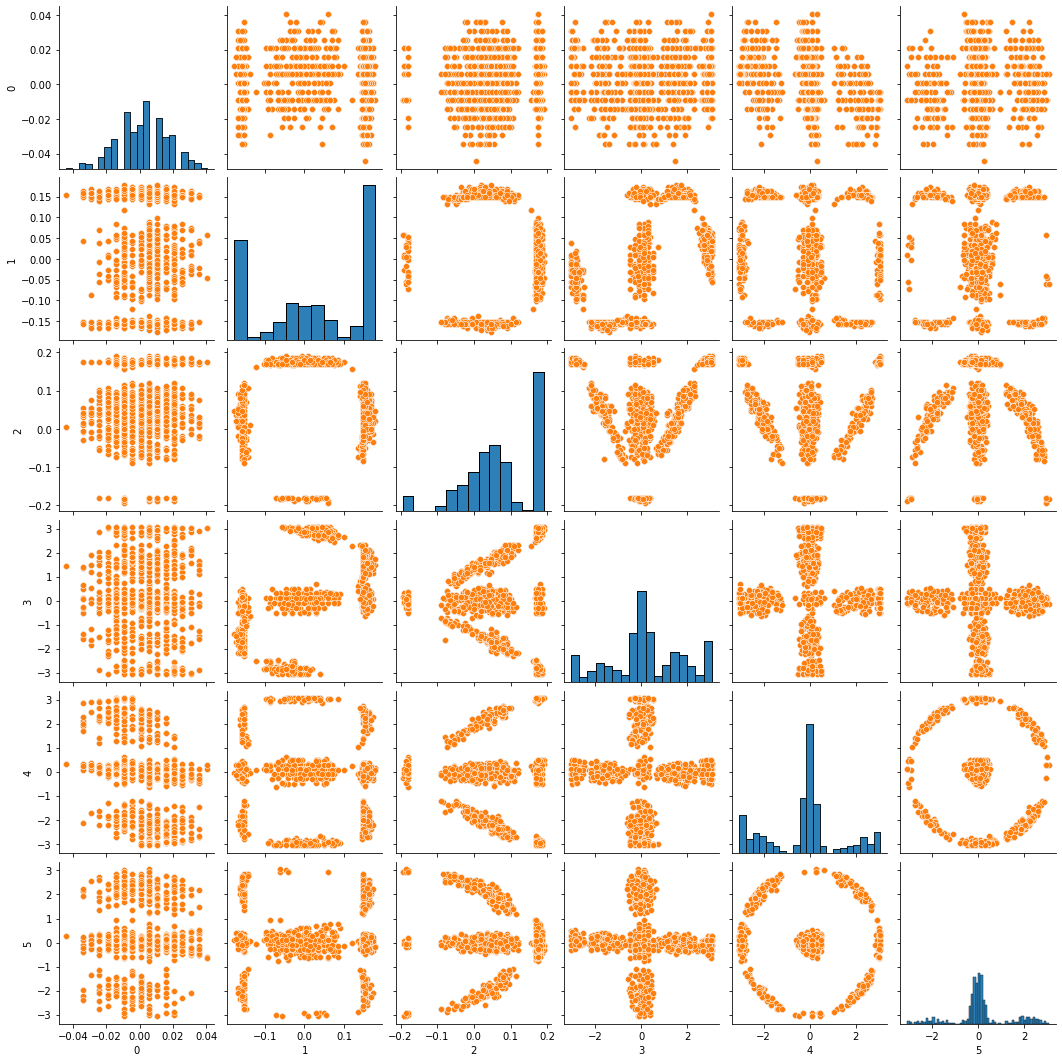

In [27]:

df = pd.DataFrame(np.hstack([xyzs[index], rotvecs[index]]), columns=range(6))
g = sns.pairplot(df)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)



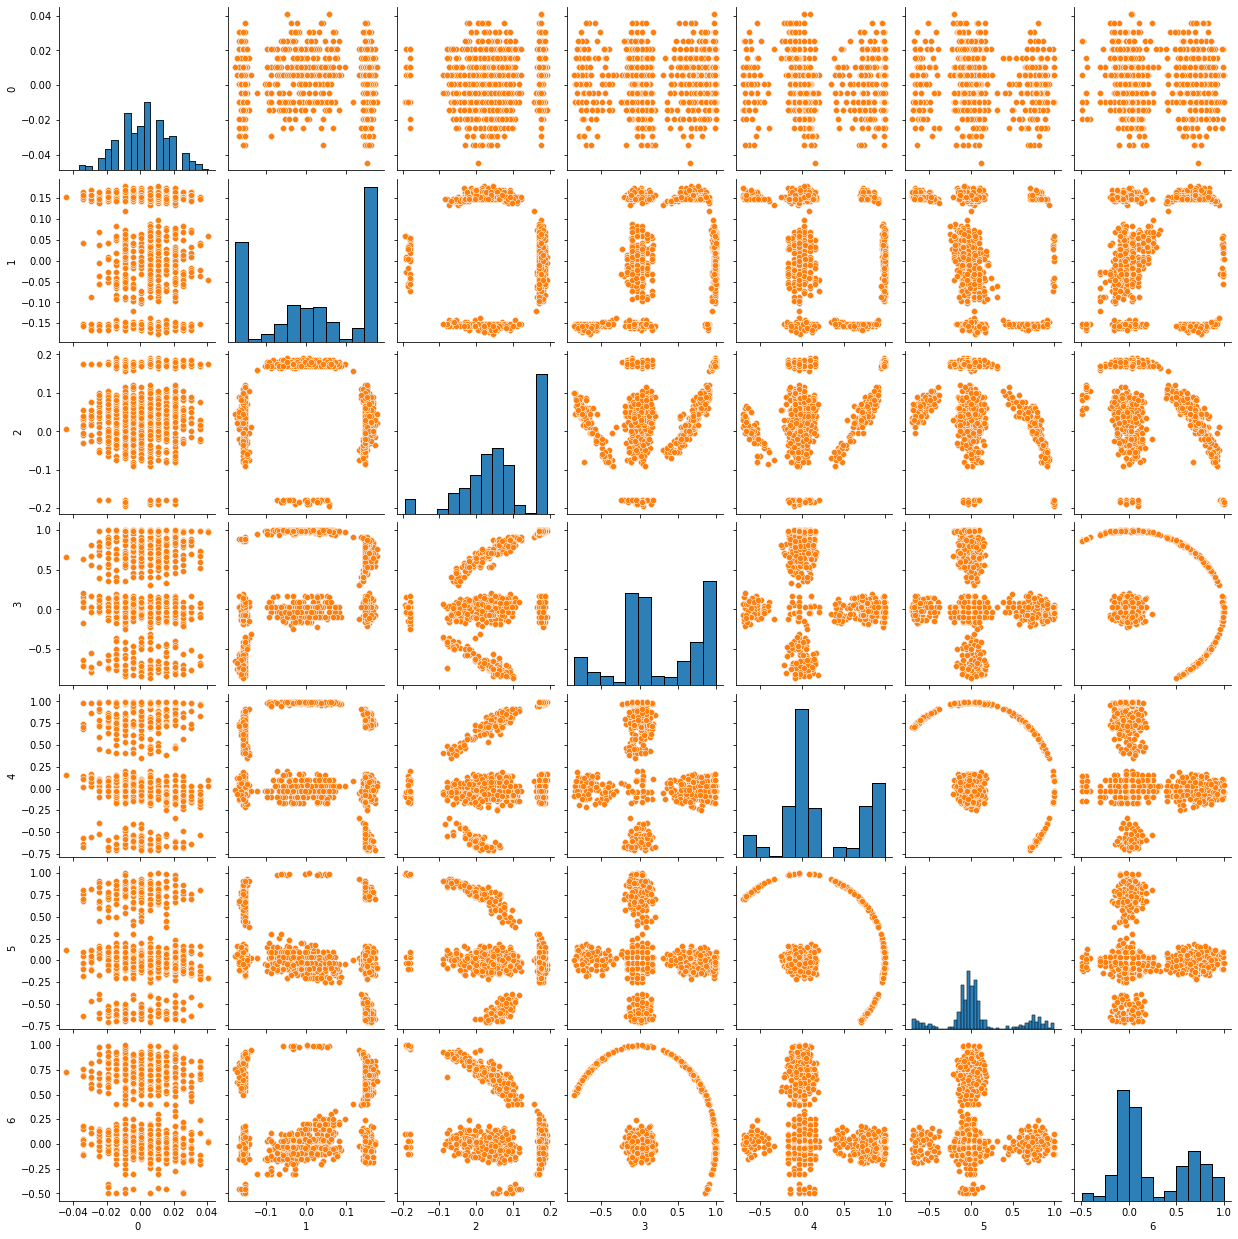

In [28]:
df = pd.DataFrame(np.hstack([xyzs[index], quats[index]]), columns=range(7))
g = sns.pairplot(df)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)